In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

import statsmodels.formula.api as smf
import statsmodels.api as sm
import lmdiag

In [8]:
np.random.seed(1)
x1 = pd.Series(np.random.uniform(size=100))
x2 = pd.Series(0.5*x1 + np.random.normal(size=100)/10)
y  = pd.Series(2 + 2*x1 + 0.3*x2 + np.random.normal(size=100))

In [48]:
data=pd.concat([x1, x2, y], axis=1).rename(columns={0:'x1', 1:'x2', 2:'y'})
data.head()

,x1,x2,y
0,0.417022,0.240074,2.949735
1,0.720324,0.157942,3.261717
2,0.000114,-0.030563,3.322517
3,0.302333,0.233964,2.387546
4,0.146756,0.096387,3.002498


In [13]:
lm1 = smf.ols(formula='y ~ 1 + x1 + x2', data = data).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Sat, 03 Oct 2020   Prob (F-statistic):           4.40e-07
Time:                        15:24:03   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P&gt;|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1893      0.199     11.021      

In [14]:
# Accecpt the Null Hypothesis for Beta 2

In [15]:
lm2 = smf.ols(formula='y ~ 1 + x1', data = data).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Sat, 03 Oct 2020   Prob (F-statistic):           6.68e-07
Time:                        15:25:58   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P&gt;|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2486      0.201     11.209      

In [16]:
# Reject the Null Hypothesis for Beta 1

In [17]:
lm3 = smf.ols(formula='y ~ 1 + x2', data = data).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Sat, 03 Oct 2020   Prob (F-statistic):           1.09e-07
Time:                        15:26:45   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P&gt;|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2655      0.187     12.145      

In [18]:
# Reject the Null Hypothesis for Beta 1

In [27]:
# Find VIF value
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = sm.add_constant(data[['x1','x2']])
for i in range(X.shape[1]-1):
    print('{:10}'.format(data.columns[i]), '{:.4f}'.format(variance_inflation_factor(X.values, i)))

x1         3.7940
x2         3.3786


In [49]:
data = data.append({'x1':0.1, 'x2':0.8, 'y':6}, ignore_index=True)
data

,x1,x2,y
0,0.417022,0.240074,2.949735
1,0.720324,0.157942,3.261717
2,0.000114,-0.030563,3.322517
3,0.302333,0.233964,2.387546
4,0.146756,0.096387,3.002498
...,...,...,...
96,0.903380,0.386998,4.758863
97,0.573679,0.376988,4.803815
98,0.002870,0.254268,2.840827
99,0.617145,0.283709,4.204311


In [51]:
lm1_2 = smf.ols(formula='y ~ 1 + x1 + x2', data = data).fit()
print(lm1_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     19.92
Date:                Sat, 03 Oct 2020   Prob (F-statistic):           5.51e-08
Time:                        15:43:20   Log-Likelihood:                -144.15
No. Observations:                 101   AIC:                             294.3
Df Residuals:                      98   BIC:                             302.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P&gt;|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1996      0.199     11.041      

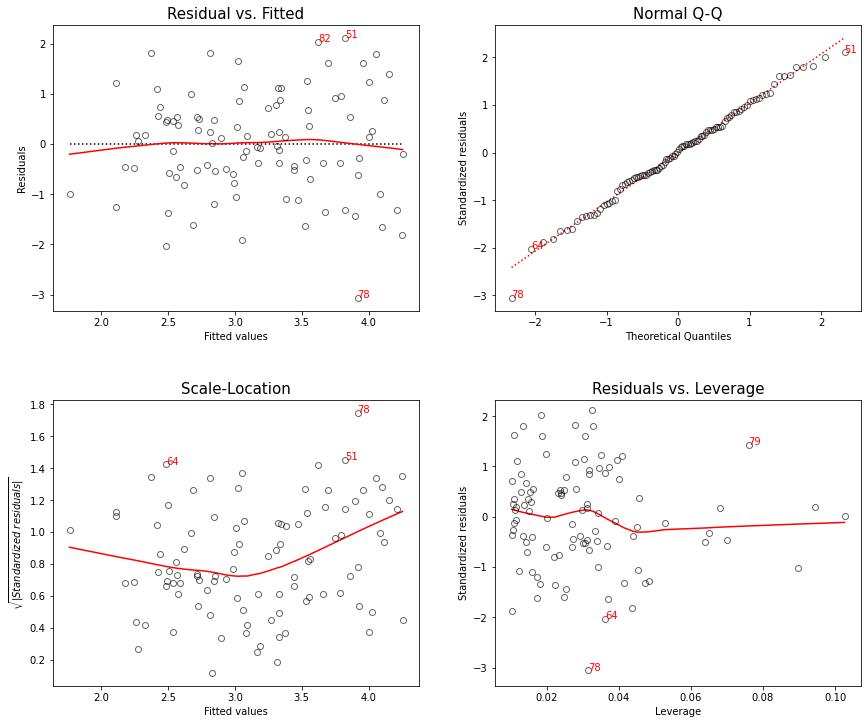

In [52]:
plt.figure(figsize=(12,10))
lmdiag.plot(lm1);

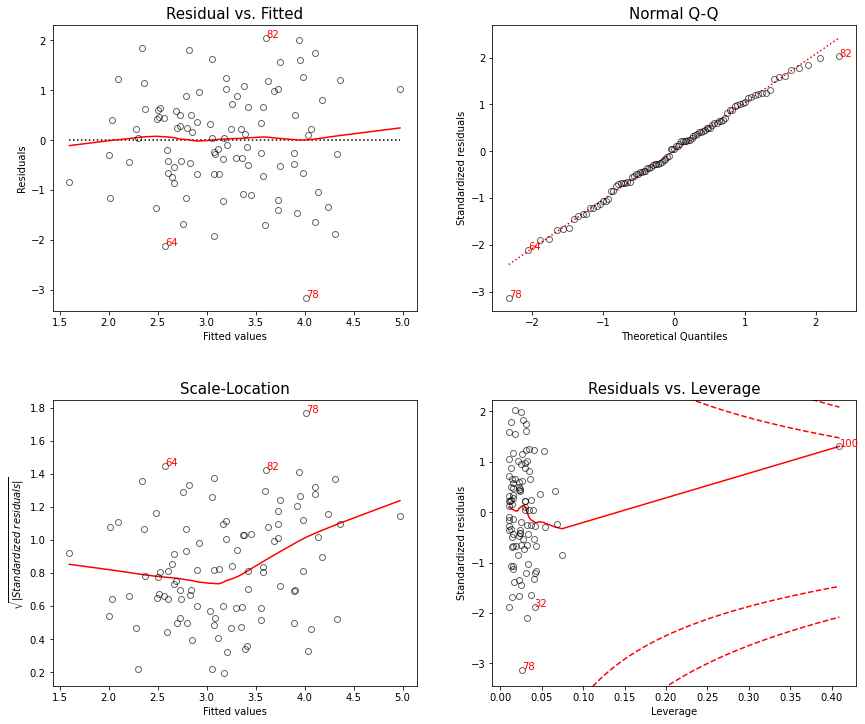

In [53]:
plt.figure(figsize=(12,10))
lmdiag.plot(lm1_2);

In [55]:
# Outliers sames, High point leverage is the new point added